### Apoorv Gupta
#### AIML A1
#### 21070126018

In [8]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
from spacy import displacy

# Suppressing warnings
warnings.filterwarnings('ignore')

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv("/kaggle/input/blog-authorship-corpus/blogtext.csv", nrows=5000)
print(df.shape)


(5000, 7)


In [9]:
# Initialize SpaCy for NER
nlp = spacy.load("en_core_web_sm")

# 1) Apply CountVectorizer to get Top 50 words by count
count_vectorizer = CountVectorizer(max_features=50, stop_words='english')
count_matrix = count_vectorizer.fit_transform(df['text'])
count_words = count_vectorizer.get_feature_names_out()

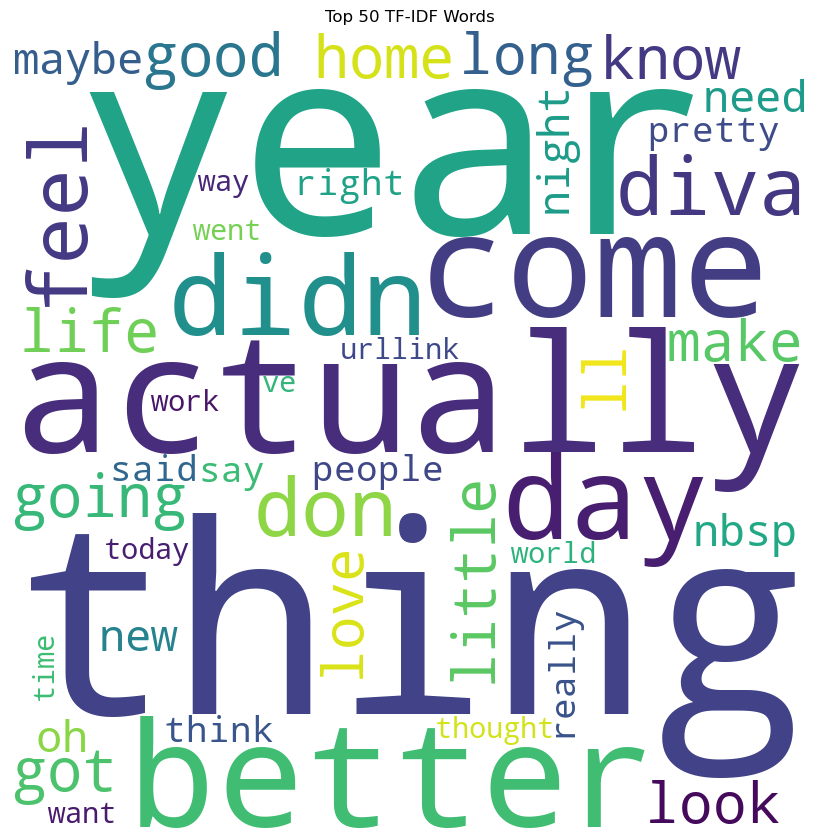

In [10]:
# 2) Apply TFIDF Vectorizer to get Top 50 words with high tfidf score and create word cloud
tfidf_vectorizer = TfidfVectorizer(max_features=50, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])
tfidf_words = tfidf_vectorizer.get_feature_names_out()

# Create a WordCloud from the TF-IDF words
tfidf_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(" ".join(tfidf_words))

# Display the WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(tfidf_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Top 50 TF-IDF Words')
plt.show()

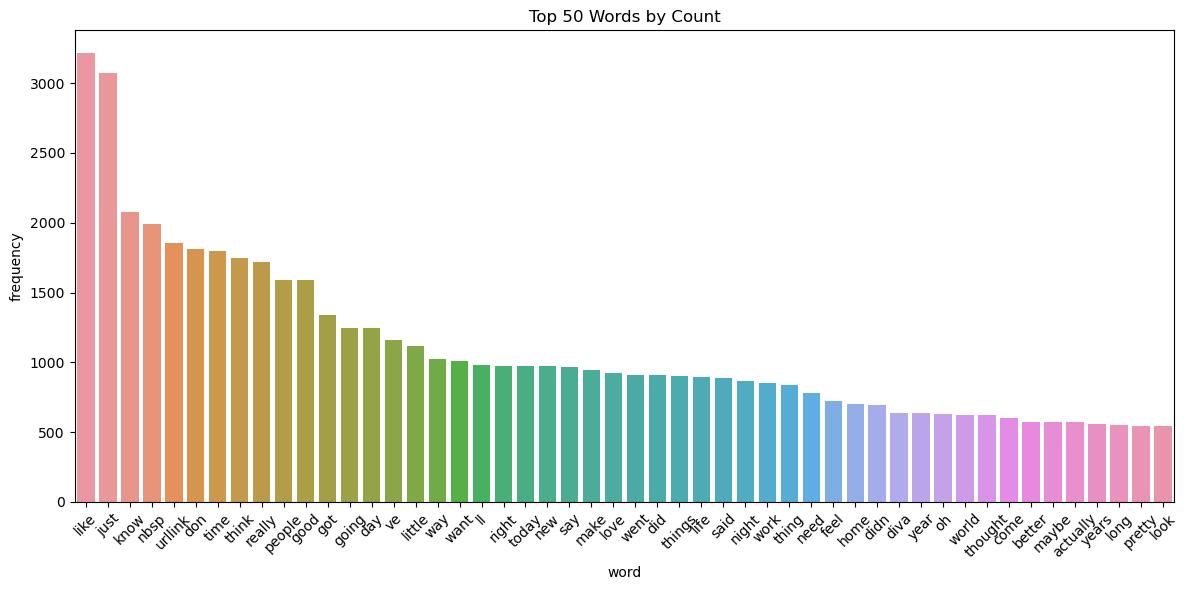

In [11]:
# Plot the bar chart for word frequencies
word_freq = count_matrix.sum(axis=0).tolist()[0]
word_freq_df = pd.DataFrame({'word': count_words, 'frequency': word_freq})
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='frequency', data=word_freq_df)
plt.xticks(rotation=45)
plt.title('Top 50 Words by Count')
plt.tight_layout()
plt.show()

In [12]:
# 3) Use SpaCy to identify Named Entity Recognition (NER) and plot sentences with NER
sample_sentences = df['text'].sample(5)  # You can choose the number of sentences to display

for sentence in sample_sentences:
    doc = nlp(sentence)
    displacy.render(doc, style="ent", jupyter=True)

In [13]:
# Print statistics about named entity types and frequencies
ner_stats = Counter([ent.label_ for doc in nlp.pipe(df['text']) for ent in doc.ents])
print("Named Entity Recognition Statistics:")
print(ner_stats)

Named Entity Recognition Statistics:
Counter({'PERSON': 8819, 'DATE': 7113, 'ORG': 5878, 'CARDINAL': 5650, 'GPE': 4326, 'TIME': 2365, 'NORP': 1827, 'ORDINAL': 1139, 'WORK_OF_ART': 474, 'LOC': 469, 'MONEY': 434, 'PRODUCT': 386, 'FAC': 330, 'QUANTITY': 252, 'LANGUAGE': 166, 'PERCENT': 160, 'EVENT': 158, 'LAW': 83})
